In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from scipy.stats import gaussian_kde

In [2]:
# Cargar los datos desde el archivo Excel
df = pd.read_excel('metabolomic.xlsx')

In [3]:
# Separar las características (X) y la variable objetivo (y)
X = df.drop('Result', axis=1)  # Reemplaza 'target' con el nombre de tu columna de salida/clase
y = df['Result']

In [4]:
# Aplicar SMOTE para balancear los datos
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [5]:
# Combinar de nuevo las características y la variable objetivo en un DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Result'])], axis=1)

In [6]:
# Guardar el DataFrame balanceado en un nuevo archivo Excel
df_resampled.to_excel('metabolomic_augmented.xlsx', index=False)

print("Los datos han sido balanceados y guardados en 'datos_balanceados.xlsx'")


Los datos han sido balanceados y guardados en 'datos_balanceados.xlsx'


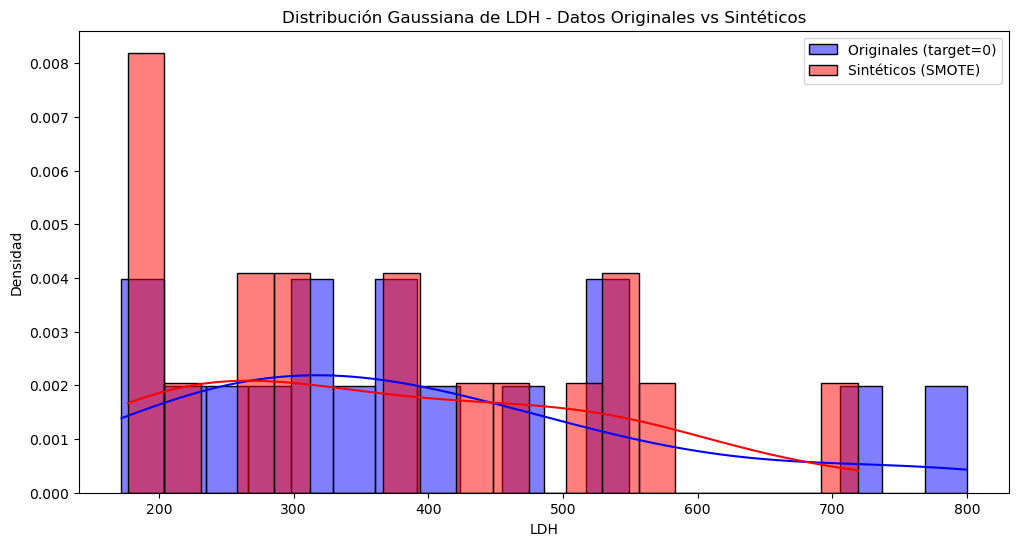

In [12]:
# Graficar la distribución de una característica seleccionada
feature = 'LDH'  # Reemplaza 'nombre_columna' por la columna que deseas graficar

# Datos originales (target=0)
data_original = df[df['Result'] == 0][feature]

# Datos sintéticos (target=0, después de SMOTE)
data_sintetica = df_resampled[(df_resampled['Result'] == 0) & (~df_resampled.index.isin(df.index))][feature]

# Gráfico de las distribuciones
plt.figure(figsize=(12, 6))

# Histograma y KDE de datos originales
sns.histplot(data_original, kde=True, color='blue', stat="density", label='Originales (target=0)', bins=20)

# Histograma y KDE de datos sintéticos
sns.histplot(data_sintetica, kde=True, color='red', stat="density", label='Sintéticos (SMOTE)', bins=20)

plt.title(f'Distribución Gaussiana de {feature} - Datos Originales vs Sintéticos')
plt.xlabel(feature)
plt.ylabel('Densidad')
plt.legend()
plt.show()